<a href="https://colab.research.google.com/github/Neeharikavasadi/Machine-Learning/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading the Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from joblib import dump
import warnings
warnings.filterwarnings('ignore')

#Loading the data set

In [ ]:
pima_df = pd.read_csv("/content/diabetes.csv")  # Ensure the file is in the same directory or provide the full path.
print("Dataset loaded successfully.")

Dataset loaded successfully.


#Exploratory Data Analysis (EDA)

In [ ]:
print("First 5 rows of the dataset:")
print(pima_df.head())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
print("\nDataset Summary:")
print(pima_df.describe())


Dataset Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000

In [ ]:
print("\nDataset Information:")
print(pima_df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
print("\nNull Values in the Dataset:")
print(pima_df.isnull().sum())


Null Values in the Dataset:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Check if 'Outcome' is in the dataset and contains valid values
print("\nUnique values in 'Outcome' column:", pima_df['Outcome'].unique())



Unique values in 'Outcome' column: [1 0]


#Visualizations of data

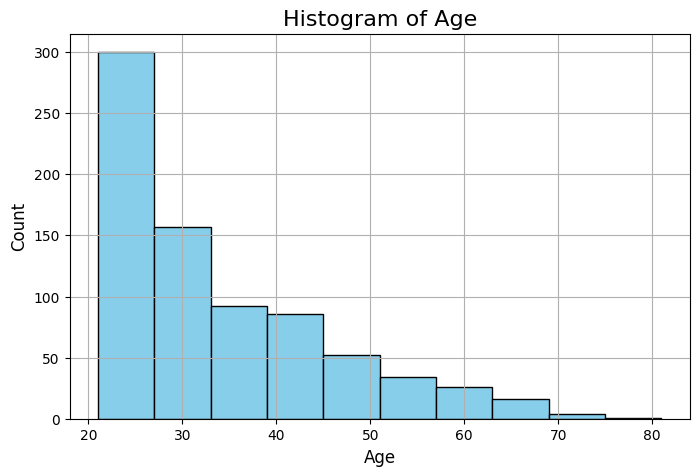

In [ ]:
plt.figure(figsize=(8, 5))
pima_df['Age'].hist(color='skyblue', edgecolor='black')
plt.title("Histogram of Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

<ipython-input-9-87129ee30d41>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=pima_df, palette='pastel')


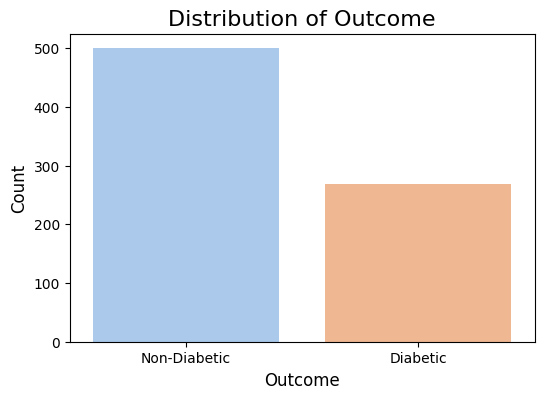

In [ ]:
# Outcome distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=pima_df, palette='pastel')
plt.title('Distribution of Outcome', fontsize=16)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'])
plt.show()

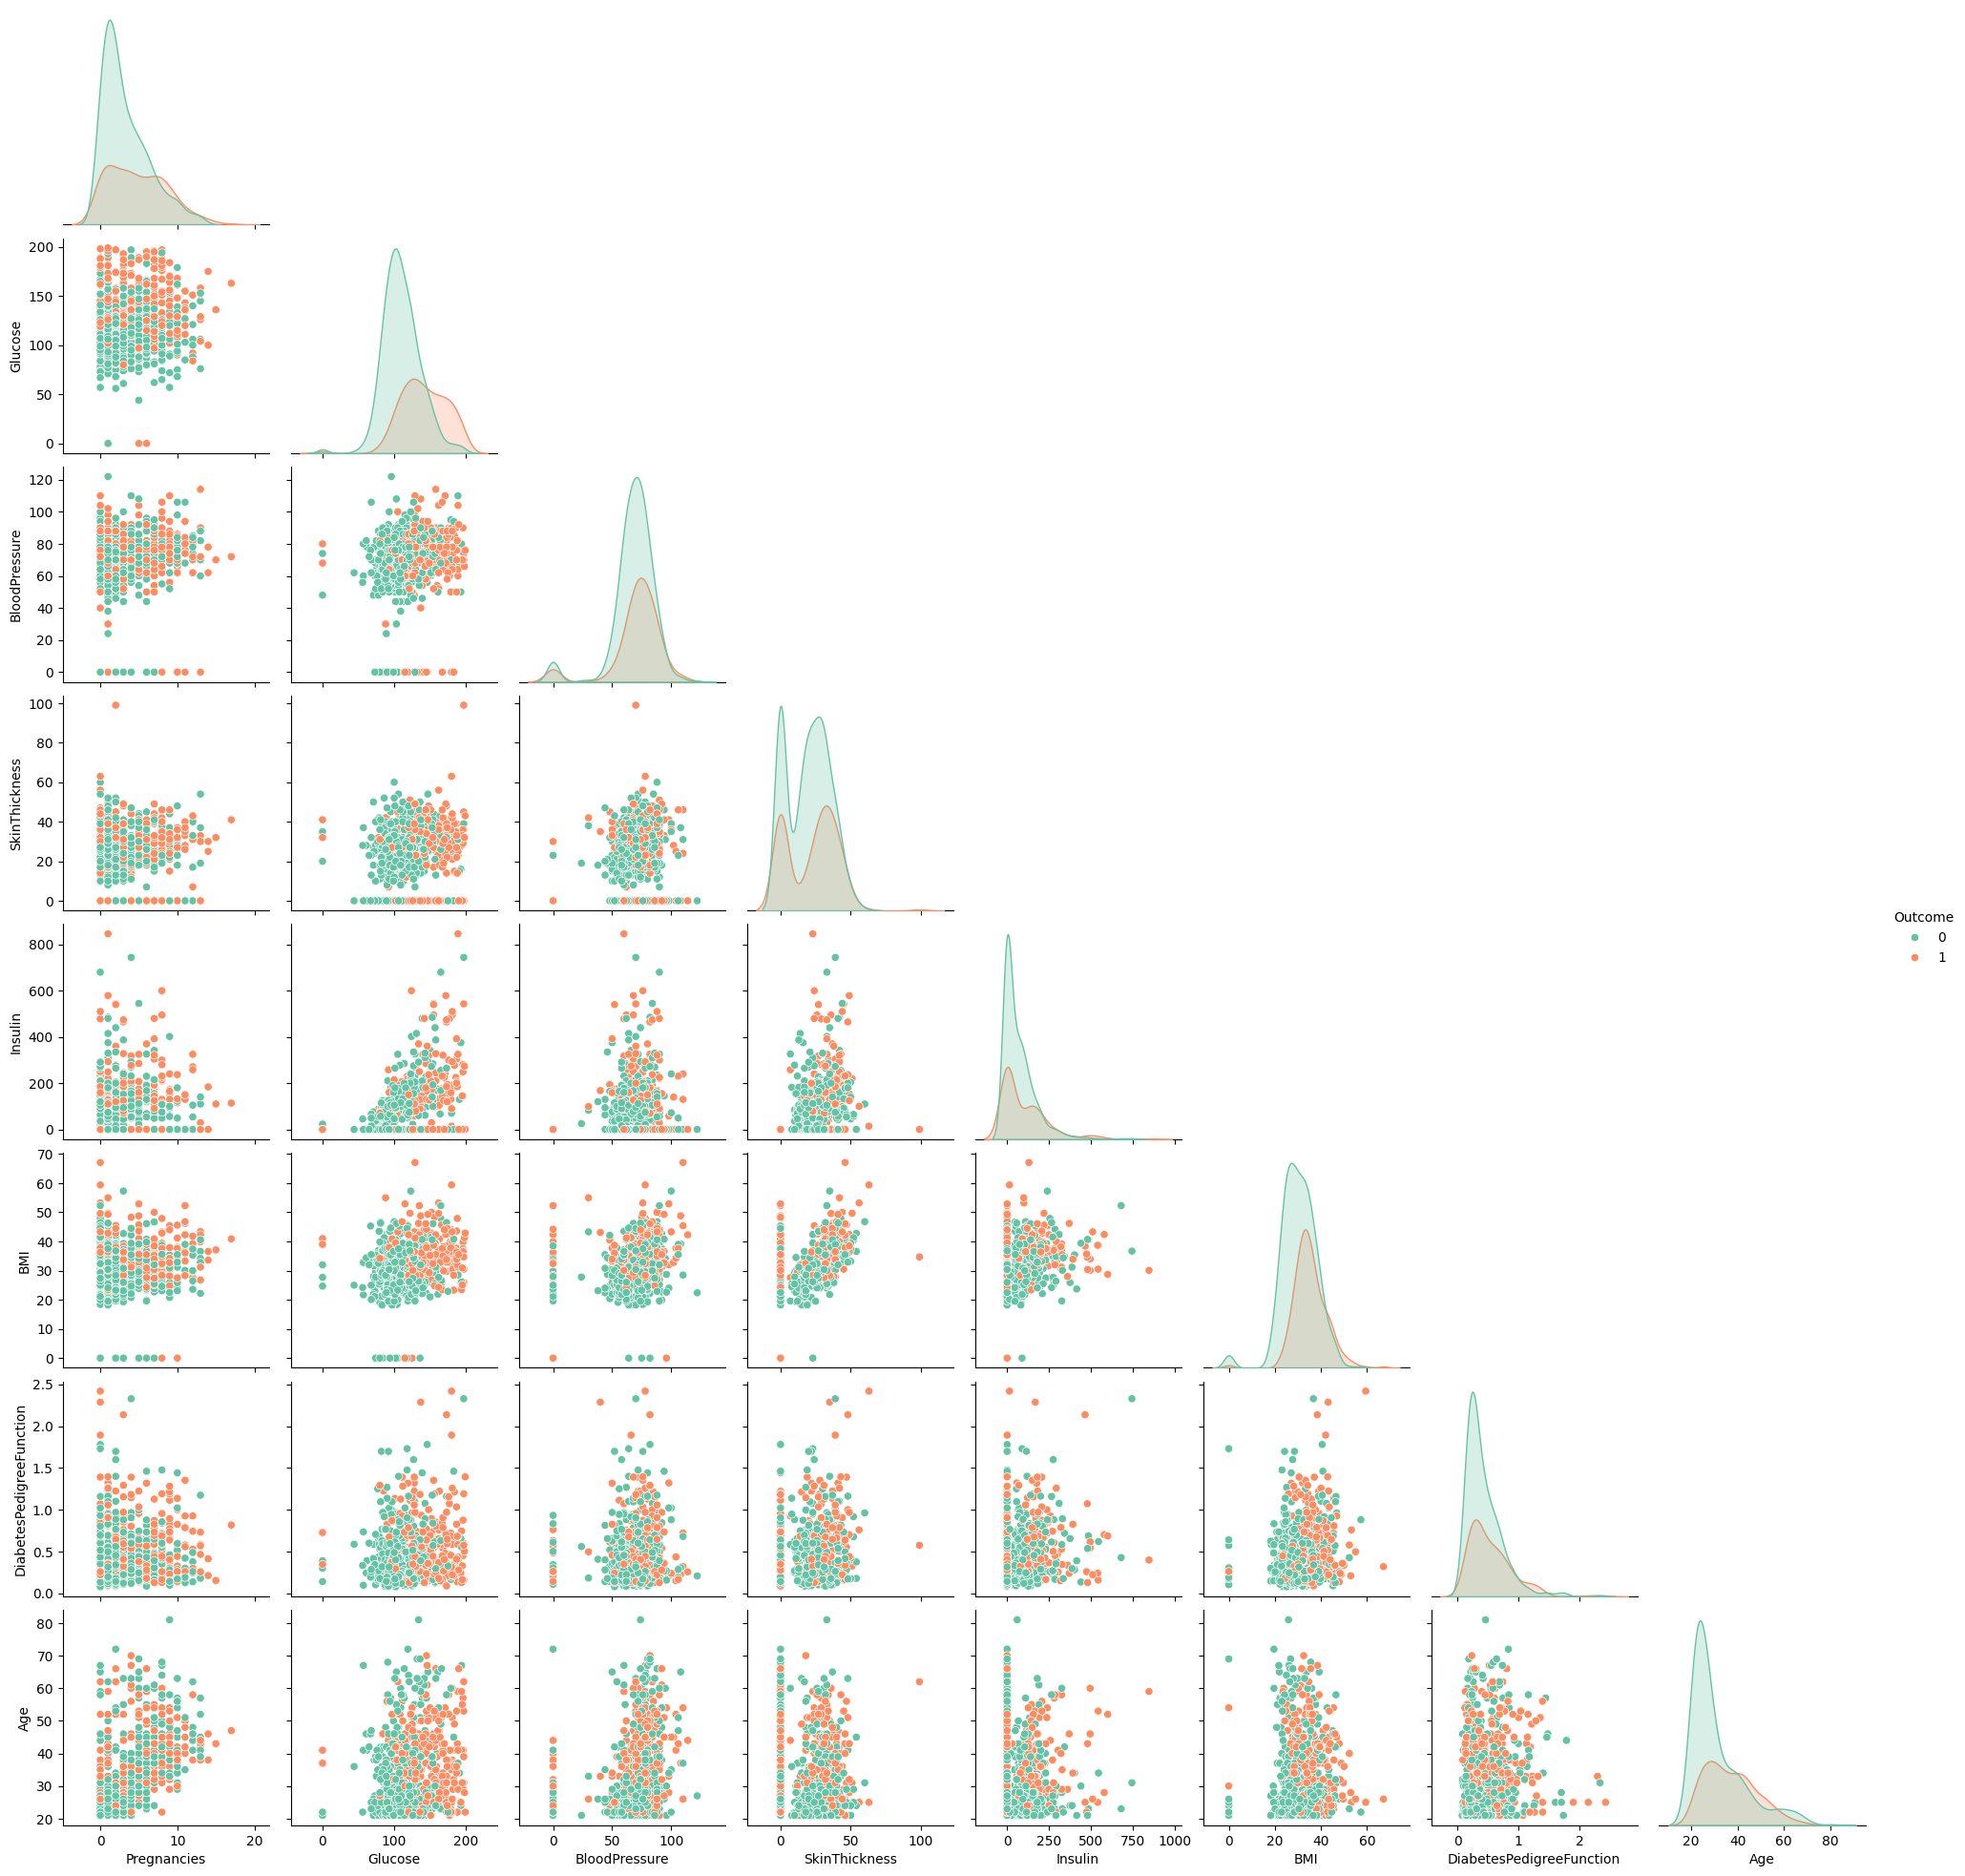

In [ ]:
sns.pairplot(pima_df, hue='Outcome', corner=True, palette='Set2')
plt.show()

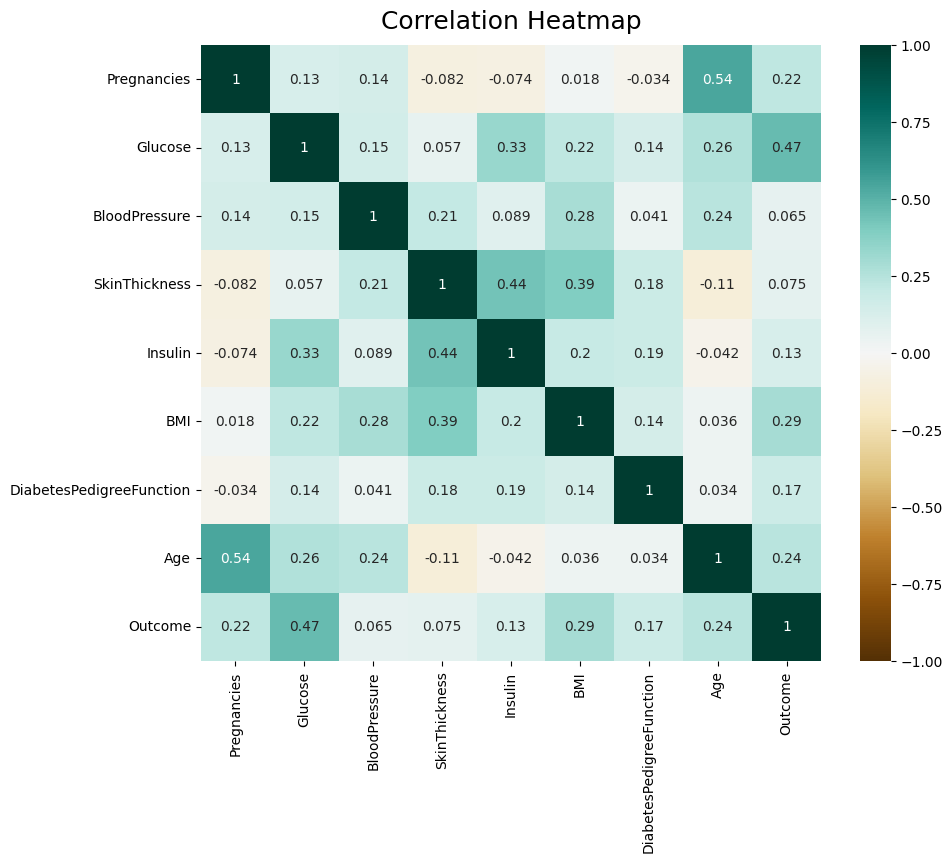

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pima_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)
plt.show()

#Pre-Processing

In [ ]:
# Import the necessary class
from sklearn.impute import SimpleImputer

# Imputation: Replace 0 values in certain columns with the column median
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
imputer = SimpleImputer(missing_values=0, strategy='median')

In [ ]:
pima_df[columns_to_impute] = imputer.fit_transform(pima_df[columns_to_impute])


In [ ]:
# Verify no zero values remain in these columns
print("\nAfter imputation, minimum values in relevant columns:")
print(pima_df[columns_to_impute].min())



After imputation, minimum values in relevant columns:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
BMI              0.0
dtype: float64


In [ ]:
# Partitioning the data set
X = pima_df.drop('Outcome', axis=1)
y = pima_df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"\nTraining data shape: {X_train.shape}, Test data shape: {X_test.shape}")



Training data shape: (537, 8), Test data shape: (231, 8)


#Building the Random Forest Classifier

In [ ]:
# Building the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=1000, random_state=42)


In [ ]:
# Training the model
print("Training the Random Forest Classifier...")
rfc.fit(X_train, y_train)

Training the Random Forest Classifier...


RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
# Predictions
preds_rfc = rfc.predict(X_test)
print(f"First 10 predictions: {preds_rfc[:10]}")  # Check the first 10 predictions
print(f"First 10 true labels: {y_test[:10].values}")  # Check the first 10 true labels


First 10 predictions: [0 0 0 0 0 1 0 1 1 1]
First 10 true labels: [0 0 0 0 0 0 0 0 0 0]


#Model Evaluation

In [ ]:
# Model Evaluation
accuracy = accuracy_score(y_test, preds_rfc)
print(f"\nAccuracy of the Random Forest model: {accuracy * 100:.2f}%")



Accuracy of the Random Forest model: 75.32%


In [ ]:
# Detailed Evaluation
print("\nRandom Forest Classifier's Evaluation Report:")
print(classification_report(y_test, preds_rfc))



Random Forest Classifier's Evaluation Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.64      0.65      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, preds_rfc))



Confusion Matrix:
[[122  29]
 [ 28  52]]


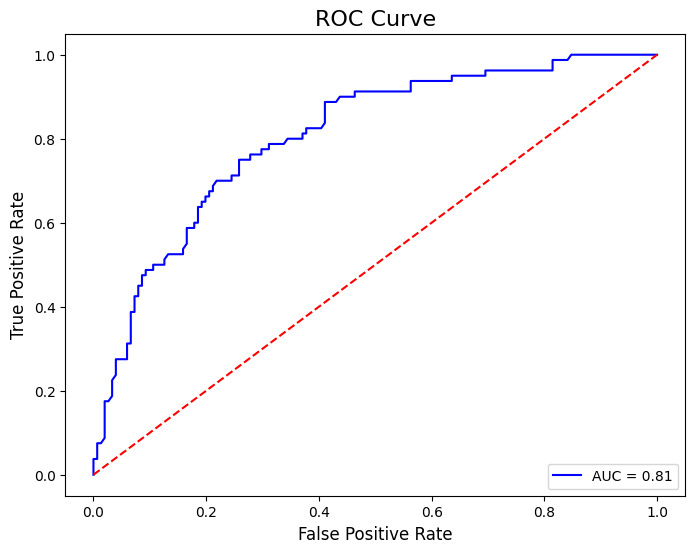

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix

# ... (rest of your code) ...

# ROC Curve and AUC
y_proba = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)  # Now roc_curve is defined
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score # Import cross_val_score

# ... (rest of your code) ...

# Cross-validation Accuracy
cv_scores = cross_val_score(rfc, X, y, cv=5)
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")


Cross-Validation Accuracy Scores: [0.76623377 0.73376623 0.75324675 0.83660131 0.75163399]
Mean Cross-Validation Accuracy: 76.83%


<ipython-input-26-d84f44c60987>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


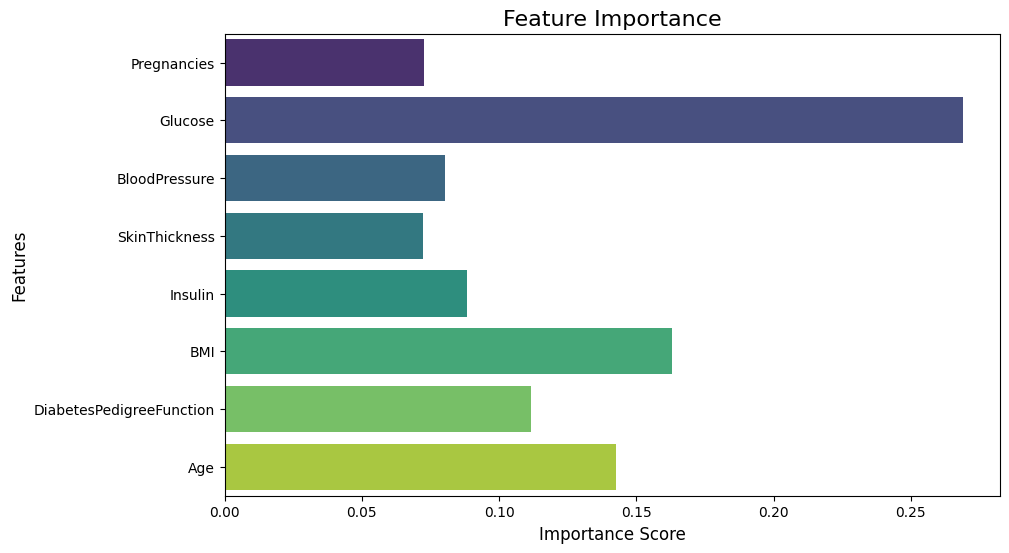

In [ ]:
# Feature Importance
plt.figure(figsize=(10, 6))
importances = rfc.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()